# PROJETO I.A. DERMATOLOGISTA

O objetivo desse projeto final de conclusão do Nanodegree Engenheiro de Machine Learning, é desenvolver uma CNN (rede neural convolucional) para detectar doenças de pele, a rede consegue distinguir a forma mais mortal de câncer de pele o Melanoma, de outras duas doenças de pele benignas, Nevus e Seborrheic Keratosis. 

### Funções para Realizar o Pré-processamento dos Dados

A função load_dataset recebe como argumento o caminho relativo dos dados de treinamento, teste e validação, e retorna os mesmos dados na forma de arrays numpy, além das suas respectivas classes alvo, convertidos em codificação one-hot.

In [35]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
import pandas as pd
from glob import glob
import cv2                
import matplotlib.pyplot as plt  
import sys,os
import tensorflow as tf

%matplotlib inline 


# define function to load train, test, and validation datasets
def load_dataset(path):
    num=len(os.listdir(path)) #number of classes within the directory
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), num)
    return files, targets

A função paths_to_tensor recebe como argumento os dados retornados pela função load_dataset, e os converte em uma lista de tensores, que são retornados pela função, usando a função auxiliar path_to_tensor.

In [2]:
from keras.preprocessing import image                  
from tqdm import tqdm
from keras.applications.nasnet import preprocess_input

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    # Resizes the images to the format (331,331), which is the default imageet image format
    img = image.load_img(img_path, target_size=(331,331))
    # convert PIL.Image.Image type to 3D tensor with shape (331,331,3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1,450,450,3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

### Carrega os Dados

Os dados de treinamento, teste e validação são carregados usando a função load_dataset.

Carrega os dados do dataset MELANOMA x REST

In [74]:
# load train, test, and validation datasets
image_path_1='data_1/train'
image_path_2='data_1/valid'
image_path_3='data_1/test'

train_files_1, train_targets_1 = load_dataset(image_path_1)
valid_files_1, valid_targets_1 = load_dataset(image_path_2)
test_files_1, test_targets_1 = load_dataset(image_path_3)

# load list of disease names
disease_names_1 = os.listdir(image_path_1)


Carrega os dados do dataset SEBORRHEIC KERATOSIS x REST

In [75]:
# load train, test, and validation datasets
image_path_1='data_2/train'
image_path_2='data_2/valid'
image_path_3='data_2/test'

train_files_2, train_targets_2 = load_dataset(image_path_1)
valid_files_2, valid_targets_2 = load_dataset(image_path_2)
test_files_2, test_targets_2 = load_dataset(image_path_3)

# load list of disease names
disease_names_2 = os.listdir(image_path_1)


Exibi estatistícas referentes ao dataset.

In [17]:
disease_names=["MELANOMA","NEVUS","SEBORRHEIC KERATOSIS"]

print('Existem %d categorias de doenças: '% len(disease_names))
print(disease_names[0],',',disease_names[1],'e',disease_names[2])
print('Existem no total de %s imagens.\n' % len(np.hstack([train_files_2, valid_files_2, test_files_2])))
print('Existem %d imagens de treinamento.' % len(train_files_2))
print('Existem %d imagens de teste.'% len(test_files_2))
print('Existem %d imagens de validação.' % len(valid_files_2))

Existem 3 categorias de doenças: 
MELANOMA , NEVUS e SEBORRHEIC KERATOSIS
Existem no total de 2539 imagens.

Existem 1779 imagens de treinamento.
Existem 508 imagens de teste.
Existem 252 imagens de validação.


### Exibe uma amostra do DataSet

Exibe 10 amostras de cada classe:

### MELANOMA:

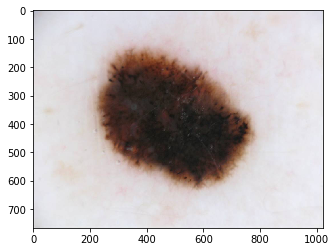

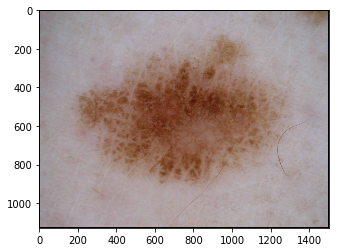

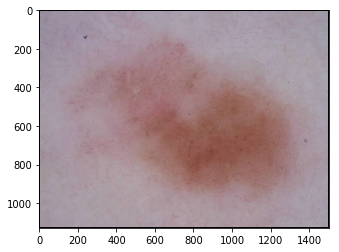

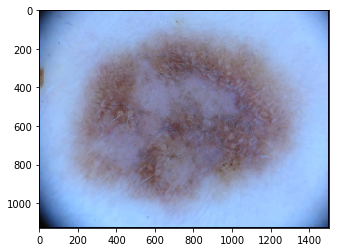

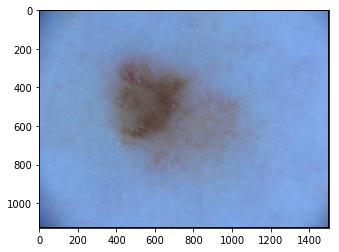

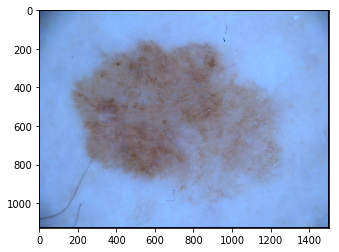

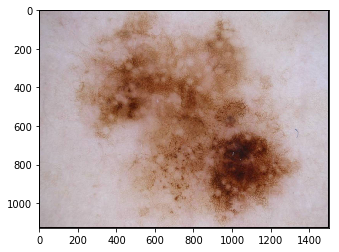

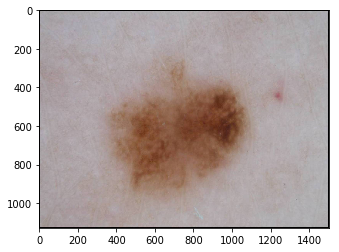

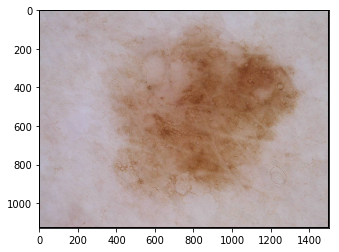

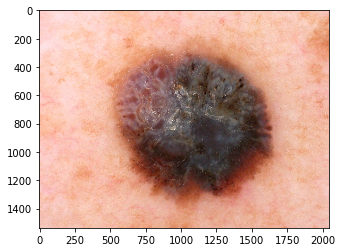

In [4]:
image_path="data_2/teste/MELANOMA"
image_path=image_path

cont=0

for img in os.listdir(image_path):
    full_path=image_path+"/"+img
    photo = cv2.imread(full_path)
    cv_rgb = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    cont+=1
    if cont==10:
        break
    

### NEVUS:

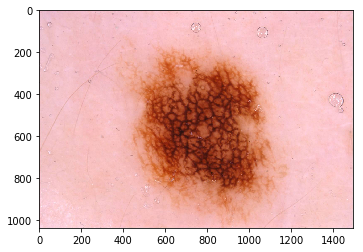

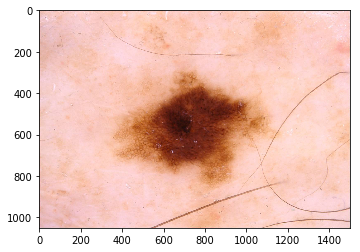

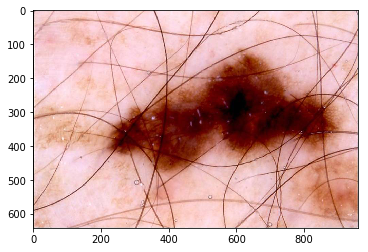

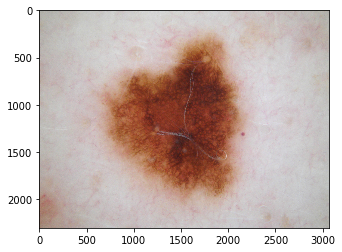

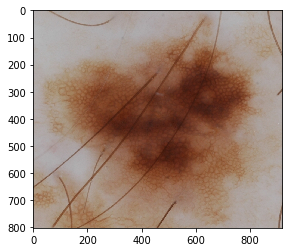

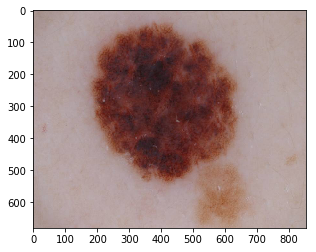

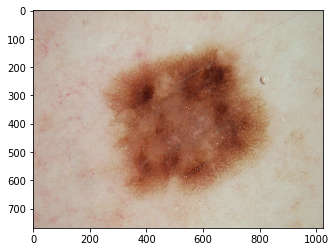

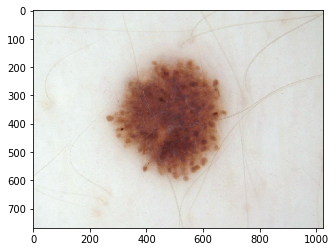

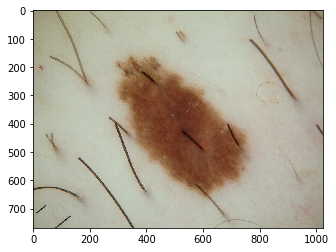

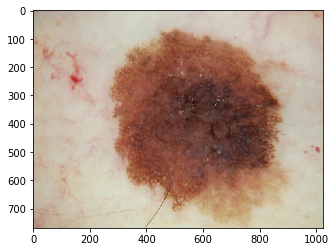

In [5]:
image_path="data_2/teste/NEVUS"
image_path=image_path

cont=0

for img in os.listdir(image_path):
    full_path=image_path+"/"+img
    photo = cv2.imread(full_path)
    cv_rgb = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    cont+=1
    if cont==10:
        break

### SEBORRHEIC KERATOSIS:

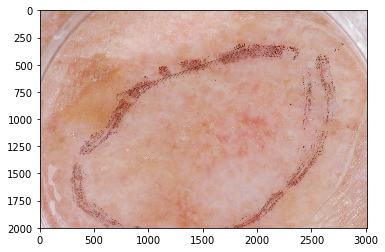

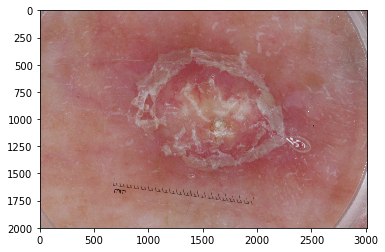

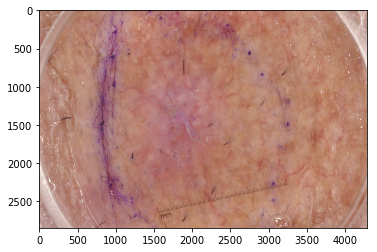

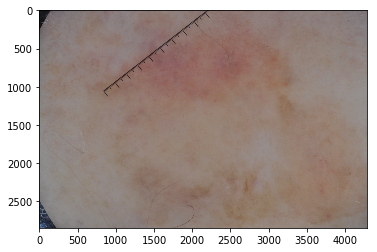

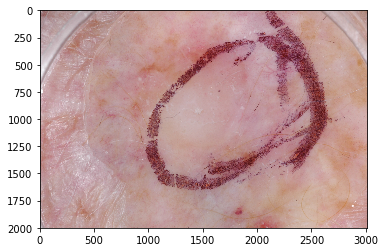

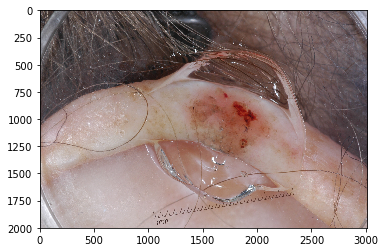

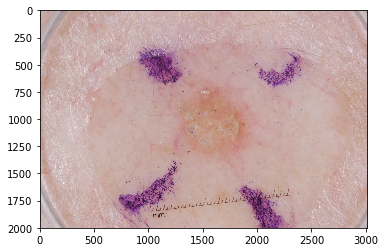

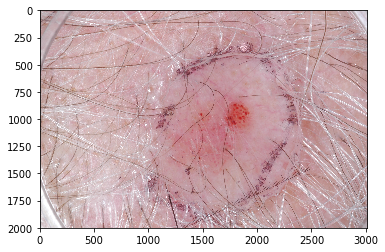

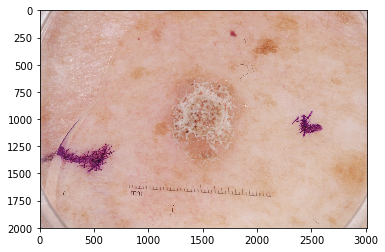

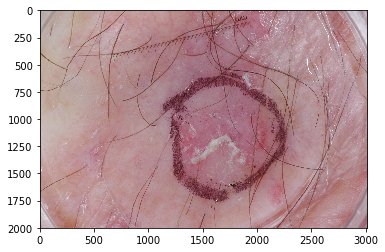

In [6]:
image_path="data_2/teste/SEBORRHEIC KERATOSIS"
image_path=image_path

cont=0

for img in os.listdir(image_path):
    full_path=image_path+"/"+img
    photo = cv2.imread(full_path)
    cv_rgb = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    cont+=1
    if cont==10:
        break

### Realiza o Pré-processamento dos Dados

Realiza o pré-processamento dos dados usando a função paths_to_tensor, para converter os dados de treinamento, teste e validação em tensores, além de converter todos os valores armazenados nos tensores no intervalo entre -0.5 e 0.5, para normalizar os dados para alimentar a rede neural.


In [44]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors_1 = (paths_to_tensor(train_files_1).astype('float32')-127.5)/255
valid_tensors_1 = (paths_to_tensor(valid_files_1).astype('float32')-127.5)/255
test_tensors_1 = (paths_to_tensor(test_files_1).astype('float32')-127.5)/255

100%|████████████████████████████████████████████████████████████████████████████████| 514/514 [01:44<00:00,  4.90it/s]


In [45]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors_2 = (paths_to_tensor(train_files_2).astype('float32')-127.5)/255
valid_tensors_2 = (paths_to_tensor(valid_files_2).astype('float32')-127.5)/255
test_tensors_2 = (paths_to_tensor(test_files_2).astype('float32')-127.5)/255

100%|████████████████████████████████████████████████████████████████████████████████| 168/168 [00:44<00:00,  3.77it/s]


### Salva os Dados

Salva os dados pré-processados, para que não seja necessário realizar todo o pré-processamento, toda vez que o projeto for executado.

In [47]:
np.savez_compressed('tensors/tensors_1', train=train_tensors_1, test=test_tensors_1, valid=valid_tensors_1)
np.savez_compressed('tensors/targets_1', train=train_targets_1, test=test_targets_1, valid=valid_targets_1)
np.savez_compressed('tensors/tensors_2', train=train_tensors_2, test=test_tensors_2, valid=valid_tensors_2)
np.savez_compressed('tensors/targets_2', train=train_targets_2, test=test_targets_2, valid=valid_targets_2)

## Transferência de Aprendizado

Abaixo seguem todas as etapas necessárias para realizar a técnica da Transferência de Aprendizado.

### Carrega os Dados Salvos

Carrega os dados de treinamento, validação e teste, salvos na forma de tensores.

In [3]:
#COMEÇAR A PARTIR DAQUI!!!
tensors_1 = np.load('tensors/tensors_1.npz')
train_tensors_1 = tensors_1['train']
valid_tensors_1 = tensors_1['valid']
test_tensors_1 = tensors_1['test']

tensors_2 = np.load('tensors/tensors_2.npz')
train_tensors_2 = tensors_2['train']
valid_tensors_2 = tensors_2['valid']
test_tensors_2 = tensors_2['test']

Carrega os rótulos de todos dados.

In [4]:
targets_1 = np.load('tensors/targets_1.npz')
train_targets_1 = targets_1['train']
valid_targets_1 = targets_1['valid']
test_targets_1 = targets_1['test']

targets_2 = np.load('tensors/targets_2.npz')
train_targets_2 = targets_2['train']
valid_targets_2 = targets_2['valid']
test_targets_2 = targets_2['test']

Carrega os recursos de gargalo que serão usados para realizar a transferência de aprendizado.

In [5]:
bottleneck_features_1 = np.load('bottleneck_features/NASNetLarge_1.npz')
train_NASNet_1 = bottleneck_features_1['train']
valid_NASNet_1 = bottleneck_features_1['valid']
test_NASNet_1 = bottleneck_features_1['test']

bottleneck_features_2 = np.load('bottleneck_features/NASNetLarge_2.npz')
train_NASNet_2 = bottleneck_features_2['train']
valid_NASNet_2 = bottleneck_features_2['valid']
test_NASNet_2 = bottleneck_features_2['test']

### Cria os Modelos

Cria o modelo 1 responsável por realizar a classificação MELANOMA x REST.

In [11]:
n_classes=len(disease_names_1) # número de classes
p_dropout = 0.50 # probabilidade de dropout
n_hidden = 8064 # número de neurônios na camada primeira oculta

NASNet_top_1 = tf.keras.models.Sequential()
NASNet_top_1.add(tf.keras.layers.GlobalAveragePooling2D(input_shape=train_NASNet_1.shape[1:]))
NASNet_top_1.add(tf.keras.layers.Dense(n_hidden))
NASNet_top_1.add(tf.keras.layers.Activation('relu'))
NASNet_top_1.add(tf.keras.layers.BatchNormalization())
NASNet_top_1.add(tf.keras.layers.Dropout(p_dropout))
NASNet_top_1.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))
NASNet_top_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_1 ( (None, 4032)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 8064)              32522112  
_________________________________________________________________
activation_261 (Activation)  (None, 8064)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8064)              32256     
_________________________________________________________________
dropout_1 (Dropout)          (None, 8064)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 16130     
Total params: 32,570,498
Trainable params: 32,554,370
Non-trainable params: 16,128
___________________________________________________________

Cria o modelo 2 responsável por realizar a classificação SEBORRHEIC KERATOSIS x REST.

In [12]:
n_classes=len(disease_names_2) # número de classes
p_dropout = 0.50 # probabilidade de dropout
n_hidden = 8064 # número de neurônios na camada primeira oculta

NASNet_top_2 = tf.keras.models.Sequential()
NASNet_top_2.add(tf.keras.layers.GlobalAveragePooling2D(input_shape=train_NASNet_2.shape[1:]))
NASNet_top_2.add(tf.keras.layers.Dense(n_hidden))
NASNet_top_2.add(tf.keras.layers.Activation('relu'))
NASNet_top_2.add(tf.keras.layers.BatchNormalization())
NASNet_top_2.add(tf.keras.layers.Dropout(p_dropout))
NASNet_top_2.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))
NASNet_top_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 4032)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 8064)              32522112  
_________________________________________________________________
activation_262 (Activation)  (None, 8064)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 8064)              32256     
_________________________________________________________________
dropout_2 (Dropout)          (None, 8064)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 16130     
Total params: 32,570,498
Trainable params: 32,554,370
Non-trainable params: 16,128
___________________________________________________________

### Define a Função de Perda

In [13]:
from keras import backend as K

def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

In [14]:
def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

### Compila os Modelos 

In [15]:
decay=1e-6

opt_1=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay, amsgrad=False, clipvalue=0.5)

NASNet_top_1.compile(loss=dice_coef_loss, optimizer=opt_1, metrics=[dice_coef])

In [16]:
decay=1e-6

opt_2=tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay, amsgrad=False, clipvalue=0.5)

NASNet_top_2.compile(loss=dice_coef_loss, optimizer=opt_2, metrics=[dice_coef])

### Treina os Modelos

In [68]:

checkpointer_1 = tf.keras.callbacks.ModelCheckpoint(filepath='saved_models/weights.best.NASNet_TOP_1.hdf5', verbose=1, save_best_only=True)

batch_size = 32
epochs = 20

NASNet_top_1.fit(train_NASNet_1, train_targets_1, 
          validation_data=(valid_NASNet_1, valid_targets_1),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer_1], verbose=1)


Train on 1780 samples, validate on 252 samples
Epoch 1/20
1780/1780 [==============================] - ETA: 47s - loss: -0.8795 - dice_coef: 0.879 - ETA: 46s - loss: -0.9233 - dice_coef: 0.923 - ETA: 45s - loss: -0.9278 - dice_coef: 0.927 - ETA: 44s - loss: -0.9330 - dice_coef: 0.933 - ETA: 43s - loss: -0.9354 - dice_coef: 0.935 - ETA: 43s - loss: -0.9223 - dice_coef: 0.922 - ETA: 43s - loss: -0.9233 - dice_coef: 0.923 - ETA: 42s - loss: -0.9139 - dice_coef: 0.913 - ETA: 42s - loss: -0.9174 - dice_coef: 0.917 - ETA: 41s - loss: -0.9129 - dice_coef: 0.912 - ETA: 41s - loss: -0.9087 - dice_coef: 0.908 - ETA: 41s - loss: -0.9079 - dice_coef: 0.907 - ETA: 40s - loss: -0.9057 - dice_coef: 0.905 - ETA: 39s - loss: -0.9026 - dice_coef: 0.902 - ETA: 38s - loss: -0.9021 - dice_coef: 0.902 - ETA: 37s - loss: -0.8941 - dice_coef: 0.894 - ETA: 36s - loss: -0.8987 - dice_coef: 0.898 - ETA: 35s - loss: -0.8968 - dice_coef: 0.896 - ETA: 34s - loss: -0.8978 - dice_coef: 0.897 - ETA: 33s - loss: -0.900


Epoch 00003: val_loss improved from -0.78695 to -0.79631, saving model to saved_models/weights.best.NASNet_TOP_1.hdf5
Epoch 4/20
1780/1780 [==============================] - ETA: 57s - loss: -0.9322 - dice_coef: 0.932 - ETA: 57s - loss: -0.8964 - dice_coef: 0.896 - ETA: 54s - loss: -0.9058 - dice_coef: 0.905 - ETA: 52s - loss: -0.9280 - dice_coef: 0.928 - ETA: 50s - loss: -0.9271 - dice_coef: 0.927 - ETA: 49s - loss: -0.9188 - dice_coef: 0.918 - ETA: 47s - loss: -0.9260 - dice_coef: 0.926 - ETA: 46s - loss: -0.9219 - dice_coef: 0.921 - ETA: 45s - loss: -0.9133 - dice_coef: 0.913 - ETA: 43s - loss: -0.9186 - dice_coef: 0.918 - ETA: 42s - loss: -0.9148 - dice_coef: 0.914 - ETA: 41s - loss: -0.9177 - dice_coef: 0.917 - ETA: 40s - loss: -0.9192 - dice_coef: 0.919 - ETA: 39s - loss: -0.9232 - dice_coef: 0.923 - ETA: 38s - loss: -0.9241 - dice_coef: 0.924 - ETA: 37s - loss: -0.9236 - dice_coef: 0.923 - ETA: 36s - loss: -0.9219 - dice_coef: 0.921 - ETA: 35s - loss: -0.9228 - dice_coef: 0.922

1780/1780 [==============================] - ETA: 48s - loss: -0.8755 - dice_coef: 0.875 - ETA: 48s - loss: -0.9274 - dice_coef: 0.927 - ETA: 47s - loss: -0.9289 - dice_coef: 0.928 - ETA: 47s - loss: -0.9464 - dice_coef: 0.946 - ETA: 46s - loss: -0.9446 - dice_coef: 0.944 - ETA: 45s - loss: -0.9362 - dice_coef: 0.936 - ETA: 44s - loss: -0.9410 - dice_coef: 0.941 - ETA: 43s - loss: -0.9405 - dice_coef: 0.940 - ETA: 42s - loss: -0.9365 - dice_coef: 0.936 - ETA: 41s - loss: -0.9262 - dice_coef: 0.926 - ETA: 40s - loss: -0.9273 - dice_coef: 0.927 - ETA: 39s - loss: -0.9257 - dice_coef: 0.925 - ETA: 39s - loss: -0.9291 - dice_coef: 0.929 - ETA: 38s - loss: -0.9291 - dice_coef: 0.929 - ETA: 38s - loss: -0.9255 - dice_coef: 0.925 - ETA: 37s - loss: -0.9292 - dice_coef: 0.929 - ETA: 36s - loss: -0.9283 - dice_coef: 0.928 - ETA: 35s - loss: -0.9242 - dice_coef: 0.924 - ETA: 34s - loss: -0.9243 - dice_coef: 0.924 - ETA: 33s - loss: -0.9261 - dice_coef: 0.926 - ETA: 32s - loss: -0.9281 - dice_coe

1780/1780 [==============================] - ETA: 51s - loss: -0.9178 - dice_coef: 0.917 - ETA: 49s - loss: -0.9047 - dice_coef: 0.904 - ETA: 48s - loss: -0.8848 - dice_coef: 0.884 - ETA: 47s - loss: -0.9017 - dice_coef: 0.901 - ETA: 47s - loss: -0.8972 - dice_coef: 0.897 - ETA: 46s - loss: -0.9085 - dice_coef: 0.908 - ETA: 45s - loss: -0.9036 - dice_coef: 0.903 - ETA: 45s - loss: -0.9103 - dice_coef: 0.910 - ETA: 44s - loss: -0.9064 - dice_coef: 0.906 - ETA: 43s - loss: -0.9065 - dice_coef: 0.906 - ETA: 42s - loss: -0.9112 - dice_coef: 0.911 - ETA: 41s - loss: -0.9127 - dice_coef: 0.912 - ETA: 40s - loss: -0.9126 - dice_coef: 0.912 - ETA: 39s - loss: -0.9140 - dice_coef: 0.914 - ETA: 38s - loss: -0.9163 - dice_coef: 0.916 - ETA: 37s - loss: -0.9181 - dice_coef: 0.918 - ETA: 36s - loss: -0.9184 - dice_coef: 0.918 - ETA: 35s - loss: -0.9195 - dice_coef: 0.919 - ETA: 34s - loss: -0.9219 - dice_coef: 0.921 - ETA: 33s - loss: -0.9227 - dice_coef: 0.922 - ETA: 32s - loss: -0.9235 - dice_coe

In [89]:
checkpointer_2 = tf.keras.callbacks.ModelCheckpoint(filepath='saved_models/weights.best.NASNet_TOP_2.hdf5', verbose=1, save_best_only=True)

batch_size = 32
epochs = 20

NASNet_top_2.fit(train_NASNet_2, train_targets_2, 
          validation_data=(valid_NASNet_2, valid_targets_2),
          epochs=epochs, batch_size=batch_size, callbacks=[checkpointer_2], verbose=1)


Train on 1779 samples, validate on 252 samples
Epoch 1/20
1779/1779 [==============================] - ETA: 53s - loss: -0.9692 - dice_coef: 0.969 - ETA: 50s - loss: -0.9846 - dice_coef: 0.984 - ETA: 49s - loss: -0.9795 - dice_coef: 0.979 - ETA: 48s - loss: -0.9618 - dice_coef: 0.961 - ETA: 47s - loss: -0.9633 - dice_coef: 0.963 - ETA: 46s - loss: -0.9694 - dice_coef: 0.969 - ETA: 45s - loss: -0.9694 - dice_coef: 0.969 - ETA: 44s - loss: -0.9694 - dice_coef: 0.969 - ETA: 44s - loss: -0.9728 - dice_coef: 0.972 - ETA: 44s - loss: -0.9755 - dice_coef: 0.975 - ETA: 45s - loss: -0.9693 - dice_coef: 0.969 - ETA: 44s - loss: -0.9706 - dice_coef: 0.970 - ETA: 44s - loss: -0.9728 - dice_coef: 0.972 - ETA: 44s - loss: -0.9748 - dice_coef: 0.974 - ETA: 43s - loss: -0.9703 - dice_coef: 0.970 - ETA: 42s - loss: -0.9701 - dice_coef: 0.970 - ETA: 41s - loss: -0.9646 - dice_coef: 0.964 - ETA: 40s - loss: -0.9666 - dice_coef: 0.966 - ETA: 39s - loss: -0.9683 - dice_coef: 0.968 - ETA: 38s - loss: -0.969

1779/1779 [==============================] - ETA: 47s - loss: -0.9692 - dice_coef: 0.969 - ETA: 45s - loss: -0.9385 - dice_coef: 0.938 - ETA: 43s - loss: -0.9487 - dice_coef: 0.948 - ETA: 41s - loss: -0.9451 - dice_coef: 0.945 - ETA: 40s - loss: -0.9499 - dice_coef: 0.949 - ETA: 39s - loss: -0.9582 - dice_coef: 0.958 - ETA: 38s - loss: -0.9621 - dice_coef: 0.962 - ETA: 37s - loss: -0.9668 - dice_coef: 0.966 - ETA: 37s - loss: -0.9705 - dice_coef: 0.970 - ETA: 37s - loss: -0.9646 - dice_coef: 0.964 - ETA: 36s - loss: -0.9650 - dice_coef: 0.965 - ETA: 36s - loss: -0.9654 - dice_coef: 0.965 - ETA: 35s - loss: -0.9655 - dice_coef: 0.965 - ETA: 34s - loss: -0.9657 - dice_coef: 0.965 - ETA: 33s - loss: -0.9639 - dice_coef: 0.963 - ETA: 32s - loss: -0.9643 - dice_coef: 0.964 - ETA: 31s - loss: -0.9664 - dice_coef: 0.966 - ETA: 30s - loss: -0.9648 - dice_coef: 0.964 - ETA: 29s - loss: -0.9650 - dice_coef: 0.965 - ETA: 28s - loss: -0.9653 - dice_coef: 0.965 - ETA: 28s - loss: -0.9640 - dice_coe

1779/1779 [==============================] - ETA: 41s - loss: -0.9385 - dice_coef: 0.938 - ETA: 41s - loss: -0.9538 - dice_coef: 0.953 - ETA: 40s - loss: -0.9692 - dice_coef: 0.969 - ETA: 39s - loss: -0.9615 - dice_coef: 0.961 - ETA: 39s - loss: -0.9630 - dice_coef: 0.963 - ETA: 38s - loss: -0.9641 - dice_coef: 0.964 - ETA: 37s - loss: -0.9687 - dice_coef: 0.968 - ETA: 36s - loss: -0.9688 - dice_coef: 0.968 - ETA: 36s - loss: -0.9688 - dice_coef: 0.968 - ETA: 35s - loss: -0.9720 - dice_coef: 0.972 - ETA: 34s - loss: -0.9717 - dice_coef: 0.971 - ETA: 33s - loss: -0.9689 - dice_coef: 0.968 - ETA: 32s - loss: -0.9696 - dice_coef: 0.969 - ETA: 32s - loss: -0.9673 - dice_coef: 0.967 - ETA: 31s - loss: -0.9654 - dice_coef: 0.965 - ETA: 30s - loss: -0.9666 - dice_coef: 0.966 - ETA: 29s - loss: -0.9595 - dice_coef: 0.959 - ETA: 29s - loss: -0.9600 - dice_coef: 0.960 - ETA: 28s - loss: -0.9605 - dice_coef: 0.960 - ETA: 27s - loss: -0.9609 - dice_coef: 0.960 - ETA: 26s - loss: -0.9628 - dice_coe

1779/1779 [==============================] - ETA: 43s - loss: -1.0000 - dice_coef: 1.000 - ETA: 43s - loss: -0.9846 - dice_coef: 0.984 - ETA: 43s - loss: -0.9897 - dice_coef: 0.989 - ETA: 44s - loss: -0.9846 - dice_coef: 0.984 - ETA: 44s - loss: -0.9692 - dice_coef: 0.969 - ETA: 44s - loss: -0.9692 - dice_coef: 0.969 - ETA: 43s - loss: -0.9692 - dice_coef: 0.969 - ETA: 42s - loss: -0.9575 - dice_coef: 0.957 - ETA: 40s - loss: -0.9623 - dice_coef: 0.962 - ETA: 39s - loss: -0.9630 - dice_coef: 0.963 - ETA: 38s - loss: -0.9663 - dice_coef: 0.966 - ETA: 37s - loss: -0.9691 - dice_coef: 0.969 - ETA: 36s - loss: -0.9715 - dice_coef: 0.971 - ETA: 35s - loss: -0.9713 - dice_coef: 0.971 - ETA: 34s - loss: -0.9732 - dice_coef: 0.973 - ETA: 33s - loss: -0.9730 - dice_coef: 0.973 - ETA: 32s - loss: -0.9710 - dice_coef: 0.971 - ETA: 31s - loss: -0.9718 - dice_coef: 0.971 - ETA: 30s - loss: -0.9717 - dice_coef: 0.971 - ETA: 29s - loss: -0.9731 - dice_coef: 0.973 - ETA: 28s - loss: -0.9744 - dice_coe

### Carrega os Pesos dos Modelos com o Melhor Desempenho

In [17]:
NASNet_top_1.load_weights('saved_models/weights.best.NASNet_TOP_1_BEST.hdf5')

In [18]:
NASNet_top_2.load_weights('saved_models/weights.best.NASNet_TOP_2_BEST.hdf5')

### Métricas de Avaliação

Abaixo seguem as principais métricas usadas para avaliar os modelos:

### Acurácia

In [19]:
# obtain the predicted disease class index for each image in the test set
NASNet_predictions_1 = [np.argmax(NASNet_top_1.predict(np.expand_dims(feature, axis=0))) for feature in test_NASNet_1]

# report test accuracy
test_accuracy = 100*np.sum(np.array(NASNet_predictions_1)==np.argmax(test_targets_1, axis=1))/len(NASNet_predictions_1)
print('Acurácia do Modelo MELANOMA x REST no Conjunto de Testes: %.4f%%' % test_accuracy)

Acurácia do Modelo MELANOMA x REST no Conjunto de Testes: 86.0236%


In [20]:
# obtain the predicted disease class index for each image in the test set
NASNet_predictions_2 = [np.argmax(NASNet_top_2.predict(np.expand_dims(feature, axis=0))) for feature in test_NASNet_2]

# report test accuracy
test_accuracy = 100*np.sum(np.array(NASNet_predictions_2)==np.argmax(test_targets_2, axis=1))/len(NASNet_predictions_2)
print('Acurácia do Modelo SEBORRHEIC KERATOSIS x REST no Conjunto de Testes: %.4f%%' % test_accuracy)

Acurácia do Modelo SEBORRHEIC KERATOSIS x REST no Conjunto de Testes: 95.8661%


In [21]:
NASNet_base=tf.keras.applications.NASNetLarge(weights='imagenet', include_top=False, input_shape=train_tensors_1.shape[1:])

In [32]:
#Função auxiliar usada na função NASNet_Predict

def Predict(model1,model2,names,test_files):
    test_tensors = (paths_to_tensor(test_files).astype('float32')-127.5)/255
    bf_prediction=model1.predict(test_tensors)
    predictions=[np.argmax(model2.predict(np.expand_dims(feature, axis=0))) for feature in bf_prediction]
    test_predictions=[names[prediction] for prediction in predictions]
    return test_predictions

A função NASNet_Predict combina as privisões dos dois modelos para compor o modelo final.

In [33]:
def NASNet_Predict(model,model1,model2,image_path):
    import sys,os
    
    disease_names=os.listdir(image_path)
    disease_names_1=['MELANOMA', 'REST']
    disease_names_2=['REST', 'SEBORRHEIC KERATOSIS']
    files, targets = load_dataset(image_path)
    test_targets=[disease_names[np.argmax(prediction)] for prediction in targets]
    predictions_1=Predict(model,model1,disease_names_1,files)
    predictions_2=Predict(model,model2,disease_names_2,files)
    test_predictions=[]
    for (p1,p2) in zip(predictions_1,predictions_2):
        if p2=="SEBORRHEIC KERATOSIS":
            test_predictions.append("SEBORRHEIC KERATOSIS")
        elif p2=="REST":
            if p1=="MELANOMA":
                test_predictions.append("MELANOMA")
            else:
                test_predictions.append("NEVUS")
    
    return test_predictions, test_targets

In [ ]:
image_path="data_2/teste"

predictions,targets=NASNet_Predict(NASNet_base,NASNet_top_1,NASNet_top_2,image_path)

100%|████████████████████████████████████████████████████████████████████████████████| 508/508 [01:49<00:00,  4.63it/s]


In [78]:
test_accuracy = 100*np.sum(np.array(predictions)==np.array(targets))/len(predictions)
print('Acurácia do Modelo final no Conjunto de Testes: %.4f%%' % test_accuracy)

Acurácia do Modelo final no Conjunto de Testes: 86.0236%


Converte as previsões do modelo e os targets em índices para que possam ser calculadas as demais métricas.

In [57]:
NASNet_predictions=[disease_names.index(prediction) for prediction in predictions]
NASNet_targets=[disease_names.index(target) for target in targets]

### Salva as Previsões do Modelo Final no Arquivo sample_predictions.csv

In [58]:
path="data_2/teste/"

Id=[]
task_1=[]
task_2=[]

for diretory in os.listdir(path):
    for (img,index) in zip(os.listdir(path+diretory),NASNet_predictions):
        Id.append(path+diretory+'/'+img)
        #se for melanoma
        if index==0:
            task_1.append(1)
            task_2.append(0)
        #se for nevus
        if index==1:
            task_1.append(0)
            task_2.append(0)
        #se for seborrheic keratosis
        if index==2:
            task_1.append(0)
            task_2.append(1)
        
raw_data = {'Id': Id,'task_1':task_1, 'task_2':task_2}
df = pd.DataFrame(raw_data, columns = ['Id', 'task_1', 'task_2'])
df.to_csv('sample_predictions.csv',index = False)

### Salva os Targets no Arquivo ground_truth.csv

In [59]:
path="data_2/teste/"

Id=[]
task_1=[]
task_2=[]

for diretory in os.listdir(path):
    for (img,index) in zip(os.listdir(path+diretory),NASNet_targets):
        Id.append(path+diretory+'/'+img)
        #se for melanoma
        if index==0:
            task_1.append(1)
            task_2.append(0)
        #se for nevus
        if index==1:
            task_1.append(0)
            task_2.append(0)
        #se for seborrheic keratosis
        if index==2:
            task_1.append(0)
            task_2.append(1)
        
raw_data = {'Id': Id,'task_1':task_1, 'task_2':task_2}
df = pd.DataFrame(raw_data, columns = ['Id', 'task_1', 'task_2'])
df.to_csv('ground_truth.csv',index = False)

In [60]:
from sklearn.metrics import fbeta_score, precision_score, recall_score
from get_results import plot_roc_auc, plot_confusion_matrix

In [61]:
test_predictions = np_utils.to_categorical(NASNet_predictions, 3)
test_targets = np_utils.to_categorical(NASNet_targets, 3)

### Precisão

In [62]:
test_precision=precision_score(test_targets, test_predictions, average='weighted')
test_precision*=100
print('Precisão no Conjunto de Testes: %.4f%%' % test_precision)

Precisão no Conjunto de Testes: 85.2121%


### Revocação (Recall)

In [63]:
test_recall=recall_score(test_targets, test_predictions, average='weighted')
#recall importante
test_recall*=100
print('Revocação no Conjunto de Testes: %.4f%%' % test_recall)

Revocação no Conjunto de Testes: 86.0236%


### FBeta Score

In [64]:
#Calcula fbeta score, usando beta igual a 4

Beta=4

test_fbeta_score=fbeta_score(test_targets, test_predictions, Beta, average='weighted')
test_fbeta_score*=100
print('F4 Score no Conjunto de Testes: %.4f%%' % test_fbeta_score)

F4 Score no Conjunto de Testes: 85.9063%


### Curva ROC

C:\Users\mathe\Anaconda3\envs\ITALO\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
C:\Users\mathe\Anaconda3\envs\ITALO\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


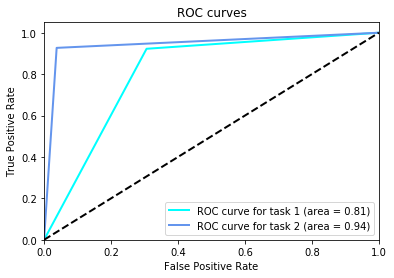

Category 1 Score: 0.808
Category 2 Score: 0.945
Category 3 Score: 0.876


In [65]:
preds_path='sample_predictions.csv'

truth = pd.read_csv('ground_truth.csv')
y_true = truth.as_matrix(columns=["task_1", "task_2"])

# get model predictions for test dataset
y_pred = pd.read_csv(preds_path)
y_pred = y_pred.as_matrix(columns=["task_1", "task_2"])

# plot ROC curves and print scores
plot_roc_auc(y_true, y_pred)

### Matriz de Confusão

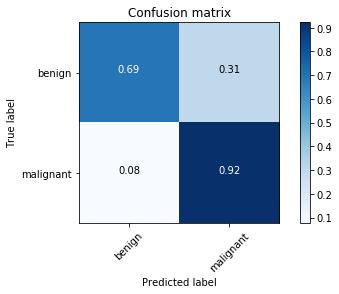

In [66]:
# plot confusion matrix
thresh=0.4
classes = ['benign', 'malignant']
plot_confusion_matrix(y_true[:,0], y_pred[:,0], thresh, classes)

### Conclusão

A CNN desenvolvida nesse projeto final de conclusão de curso alcançou uma acurácia de 86.0236% no conjunto de testes, resultado significativamente superior ao modelo de refêrencia que é de 71%, embora não tenha conseguido bons resultados para classificar a doença NEVUS, conseguiu detectar com precisão as demais doenças, principalmente o MELANOMA.